In [1]:
# Importing Libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Input Dataset
x = np.array([17, 13, 12, 15, 16, 14, 16, 16, 18, 19])
y = np.array([94, 73, 59, 80, 93, 85, 66, 79, 77, 91])

In [3]:
# Performing Train-Test Split
# 80:20 Split, Random State = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("X_train:", X_train)
print("X_test:", X_test)
print("\nY_train:", y_train)
print("Y_test:", y_test)

X_train: [14 17 16 12 19 16 15 16]
X_test: [18 13]

Y_train: [85 94 79 59 91 93 80 66]
Y_test: [77 73]


In [4]:
# Basic Data Needed for Calculations
N = len(X_train)
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

In [5]:
# Calculating Regression Line using Least Squares Method
num = 0
den = 0
for i in range(N):
    num += (X_train[i]-X_mean) * (y_train[i]-y_mean)
    den += (X_train[i]-X_mean)**2
    
b1 = num / den
b0 = y_mean - (b1 * X_mean)

regression_line = "{}*x + {}".format(b1, b0)
print("Regression Line => y = " + regression_line)

Regression Line => y = 4.138075313807532*x + 16.21757322175732


In [6]:
# Predict Values using Regression Line
y_pred = []
for val in X_train:
    y_pred.append((b1 * val) + b0)
y_pred = np.array(y_pred)
print(y_pred)

[74.15062762 86.56485356 82.42677824 65.87447699 94.84100418 82.42677824
 78.28870293 82.42677824]


In [7]:
# Karl Pearson's Correlation Coefficient Formula
num = (len(x) * np.sum(x * y)) - (np.sum(x) * np.sum(y))
den = np.sqrt(((len(x) * np.sum(x**2)) - np.sum(x)**2)*((len(x) * np.sum(y**2)) - np.sum(y)**2))

r = num/den
print("Karl Pearson's Correlation Coefficient = " + str(round(r, 2)))

Karl Pearson's Correlation Coefficient = 0.6


In [8]:
# R-Square
r_square = np.sum((y_pred - y_mean)**2) / np.sum((y_train - y_mean)**2)
print("R-Square Value: " + str(round(r_square,2)))

R-Square Value: 0.45


In [9]:
# Standard Error of the Estimate
std_error = np.sqrt(np.sum((y_pred - y_train)**2)/(N-2))
print("Standard Error of Estimate = " + str(round(std_error,2)))

Standard Error of Estimate = 10.26


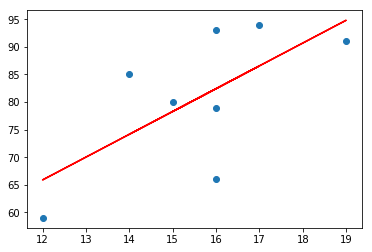

In [10]:
# Plotting Regression Line
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.show()

In [11]:
# Perfoming Predictions on Test Set
y_pred_test = []
for x in X_test:
    y_pred_test.append(eval(regression_line))
    
print("Actual:", y_test)
print("Predicted:", y_pred_test)

Actual: [77 73]
Predicted: [90.7029288702929, 70.01255230125523]


In [13]:
# Mean Square Error on Test Set
from sklearn.metrics import mean_squared_error
print("Mean Square Error", mean_squared_error(np.array(y_pred_test), y_test))

Mean Square Error 98.34755168852097
